## 목차 ##
0. Basic Setup
1. T-test Quest


# Basic Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

주피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함

In [3]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 2. t-test Quest ##
2020.csv, 2019.csv는 각각 2020년, 2019년 나라별 여러 행복 지수에 대한 데이터 이다.
2020년은 'Ladder score'이라는 값이 최종 점수 이고, 이 값으로 내림차순 정렬 되어 있다.
2019년은 'Score'이라는 값이 최종 점수 이고, 이 값으로 내림차순 정렬 되어 있다.

2020년도에서 상위 50% 나라들 중 50개를 랜덤으로 뽑고, 하위 50% 나라들 중 50개를 랜덤으로 뽑아 상위 50% 나라들의 평균 'Freedom to make life choices'가 더 큰지 검정 해주세요.

독립인 두 표본의 평균 차이를 검정하므로 독립 표본 t-test 진행


In [4]:
#20년도 데이터 불러오기
df20 = pd.read_csv('./2020.csv')
df20.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [6]:
# 필요항 컬럼만 추출
df20 = df20[['Country name', 'Freedom to make life choices']]
# 컬럼 이름 수정
df20.columns = ['country_name', 'free_choices']
df20

,country_name,free_choices
0,Finland,0.949172
1,Denmark,0.951444
2,Switzerland,0.921337
3,Iceland,0.948892
4,Norway,0.955750
...,...,...
148,Central African Republic,0.640881
149,Rwanda,0.900589
150,Zimbabwe,0.711458
151,South Sudan,0.451314


Skewness: -0.695603
Kurtosis: 0.151048


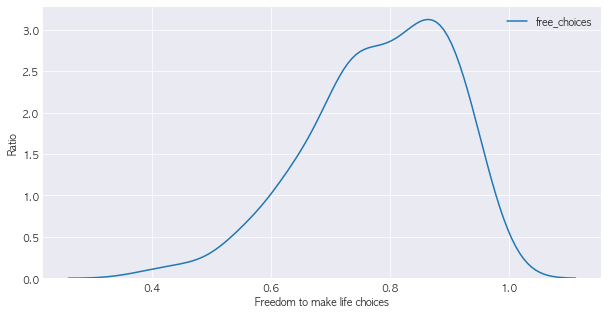

In [7]:
#free_choices의 분포 데이터
fc = df20.free_choices #trip_duration 데이터만 td라고 저장하기
plt.figure(figsize=(10,5))
kdep=sns.kdeplot(fc) 
kdep.set_xlabel("Freedom to make life choices")
kdep.set_ylabel("Ratio")
print("Skewness: %f" % fc.skew()) #Skewness: 왜도, 데이터의 비대칭성 정도를 나타냄. 0에 가까울 수록 정규분포와 비슷
print("Kurtosis: %f" % fc.kurt()) #Kurtosis: 첨도, 데이터 분포의 뽀족한 정도를 나타냄. 0에 가까울 수록 정규 분포와 비슷
plt.show() 

#t검정에 사용 가능해보이네요~!

In [8]:
#50개씩 샘플링

#일단 상위 50% 하위50%로 구분
df20_high_cut = df20[df20['free_choices']>=df20['free_choices'].quantile(0.5)]
df20_low_cut = df20[df20['free_choices']<df20['free_choices'].quantile(0.5)]

#50개씩 추출

group_high = df20_high_cut.sample(n=50, random_state=1).free_choices
group_low = df20_low_cut.sample(n=50, random_state=1).free_choices

In [9]:
#등분산검정 패키지
from scipy.stats import levene

print('등분산 검정 P-value=',levene(group_high,group_low)[1])

#p<0.05이므로 분산이 같지 않음 -> 귀무가설 기각, 이분산 독립검정 시행

등분산 검정 P-value= 0.0011469148570882731


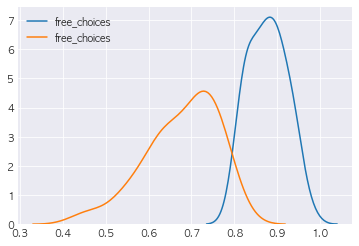

In [10]:
kdep=sns.kdeplot(group_high) 
kdep=sns.kdeplot(group_low) 
#분산이 달라보이긴 하네요...

## 독립표본 t검정
H0: group_high와 group_low 간의 평균 차이가 없다

H1: group_high와 group_low 간의 평균 차이가 있다

In [11]:
from scipy.stats import ttest_ind
print('t-test P-value =',ttest_ind(group_high, group_low, equal_var=False)[1])

t-test P-value = 3.827691559820075e-24


## 결론 
유의수준보다 현저히 적은 유의확률을 보이므로 귀무가설 기각, 두 표본에는 평균차이가 존재한다.

## 추가문제


2019 data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     156 non-null    object 
 1   free_choices_19  156 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB

2020 data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     153 non-null    object 
 1   free_choices_20  153 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.5+ KB

Ttest_relResult(statistic=-66.912743862387, pvalue=7.960733799509805e-50)


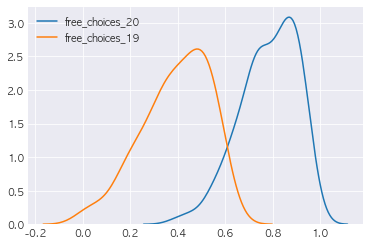

In [12]:
#19년 data 가져오고 필요한 열만 추출, 합치기 편하게 20년 data 열 이름 변경
df19 = pd.read_csv('2019.csv')
df19 = df19[['Country or region', 'Freedom to make life choices']]
df19.columns = ['country_name','free_choices_19']
print('2019 data')
df19.info()
df20.columns = ['country_name','free_choices_20']
print('\n2020 data')
df20.info()

#country name을 index로 설정하고 concatenate
df1920 = pd.concat([df19.set_index('country_name'),df20.set_index('country_name')],axis=1)
df1920 = df1920.dropna()

#50개씩 샘플링
sample_df_1920 = df1920.sample(n=50, random_state=1)
sample_19 = sample_df_1920.free_choices_19
sample_20 = sample_df_1920.free_choices_20

#ttest 대응표본검정 
#H0 = 각 나라의 19년과 20년 Freedom to make life choices가 같다
#H1 = 각 나라의 19년과 20년 Freedom to make life choices가 같지 않다
from scipy.stats import ttest_rel
print('\n', ttest_rel(sample_19,sample_20), sep='')

kdep=sns.kdeplot(df1920.free_choices_20) 
kdep=sns.kdeplot(df1920.free_choices_19) 


# pvalue가 0.05보다 작으므로 차이가 있다고 볼 수 있지만, 
# 두 집단의 각 나라의 값을 보았을 떄 각 년도의 만점 기준이 다른 것으로 보이므로 해당 수치에 통계적 의미가 있다고 해석하기는 어려움